<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20aug%20own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/Aug_PCB')
os.getcwd()

'/content/drive/My Drive/Aug_PCB'

In [3]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(5040, 300, 300, 3)
(5040,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [6]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(3376, 300, 300, 3)
(3376,)
(1664, 300, 300, 3)
(1664,)
4
float32
4
float32
4
float32


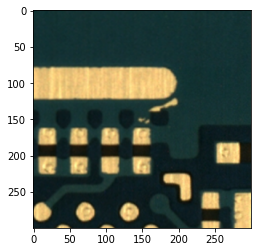

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [9]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376,)


In [10]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.20955214
0.2090465
3.781206 3.781206
-1.0024188 -1.0024188


In [11]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

Using TensorFlow backend.


[1. 0.]


In [12]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376, 2)


In [21]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model
import keras

input1 = keras.layers.Input(shape=(300,300,3))
x0=keras.layers.ZeroPadding2D(padding=(3, 3))(input1)

x1 = Conv2D(300,(7,7),strides=(2,2) ,activation='relu')(x0)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)

x5= Conv2D(200,(2,2),strides=(2,2) ,activation='relu')(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)









o=keras.layers.Flatten()(x8)








out = keras.layers.Dense(100,activation="relu")(o)

out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 306, 306, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 300)     44400     
_________________________________________________________________
batch_normalization_7 (Batch (None, 150, 150, 300)     1200      
_________________________________________________________________
activation_7 (Activation)    (None, 150, 150, 300)     0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 300)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 200)       2402

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [23]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376, 2)


In [24]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.33), batch_size=20,epochs=8, verbose=1)

Train on 2261 samples, validate on 1115 samples
Epoch 1/8
2261/2261 [==============================] - 520s 230ms/step - loss: 0.9403 - acc: 0.7784 - val_loss: 0.2811 - val_acc: 0.8780
Epoch 2/8
2261/2261 [==============================] - 519s 230ms/step - loss: 0.2092 - acc: 0.9253 - val_loss: 1.0830 - val_acc: 0.7112
Epoch 3/8
2261/2261 [==============================] - 521s 230ms/step - loss: 0.1548 - acc: 0.9522 - val_loss: 0.1896 - val_acc: 0.9345
Epoch 4/8
  20/2261 [..............................] - ETA: 7:18 - loss: 0.0586 - acc: 1.0000

KeyboardInterrupt: ignored

In [17]:
model.evaluate(xtest,ytest)

1664/1664 [==============================] - 135s 81ms/step


[8.320579418769249, 0.48377403846153844]

In [25]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.91      1.00      0.95       859
     class 1       1.00      0.89      0.94       805

    accuracy                           0.95      1664
   macro avg       0.95      0.94      0.95      1664
weighted avg       0.95      0.95      0.95      1664



In [19]:
model.evaluate(xtrain,ytrain)

1920/3376 [================>.............] - ETA: 1:57

KeyboardInterrupt: ignored

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))